# Sequntial model제작

In [1]:
import warnings
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import LSTM, Dropout, Dense, Embedding, Input
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import math
warnings.filterwarnings('ignore')

In [4]:
# tf.keras.models.load_model(model_path)

NameError: name 'model_path' is not defined

# Load Dataset

In [2]:
data = fdr.DataReader('005930','2017-10-17', '')
training_day='2020-04-23'
val_day='2020-10-25'

data.head(100)


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-10-17,54019,55380,54000,54800,212156,0.016320
2017-10-18,54820,55240,54039,54760,202215,-0.000730
2017-10-19,54699,54699,52980,52980,242174,-0.032505
2017-10-20,52800,54100,52800,53840,160541,0.016233
2017-10-23,54600,54640,54000,54300,166221,0.008544
...,...,...,...,...,...,...
2018-03-07,48200,48900,47220,48620,428541,0.034028
2018-03-08,49200,49480,48080,49200,389273,0.011929
2018-03-09,49440,50540,49240,49740,286088,0.010976


# Compute Mid Price

In [3]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

for i in range(len(high_prices)):
    if high_prices[i]==0:
        mid_prices[i] = data['Close'].values[i]

for i in range(len(mid_prices)):
    mid_prices[i]=math.ceil(mid_prices[i])

# Create Windows

In [4]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

# Normalize Data

In [5]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)


In [8]:
result = np.array(normalized_data)

# split train and test data
train_row = int(round(result.shape[0] * 0.7)) # 전체 데이터 셋의 50%만 트레이닝
val_row = int(round(result.shape[0] * 0.3)) # 전체 데이터 셋의 20%만 검증
test_row=val_row+train_row

train = result[:train_row, :]
np.random.shuffle(train) # training data를 shuffle

val = result[train_row:train_row+val_row, :]
np.random.shuffle(val) # training data를 shuffle


In [9]:
x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_val = val[:, :-1]
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
y_val = val[:, -1]

x_test = result[test_row:, :-1] #
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[test_row:, -1]

x_train.shape,x_val.shape, x_test.shape

((853, 50, 1), (365, 50, 1), (0, 50, 1))

# Build a Model

In [ ]:
x_test

357

In [10]:
from keras.layers import Input, Dense
from keras.models import Model

# This returns a tensor
inputs = Input(shape=(50, 1))

# a layer instance is callable on a tensaor, and returns a tensor
x = LSTM(64, activation='relu')(inputs)
x = LSTM(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=outputs)
model.summary()

ValueError: Input 0 of layer "lstm_1" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 64)

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))


model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 64)                29440     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


# Training

In [ ]:
model.fit([df_label_train, pad_train], target_train
				epochs=7, batch_size=32,
				callbacks=callbacks_list,
				validation_data=([sequence_test, pad_test], target_test),
				shuffle=False)

In [ ]:
model.fit(x_train, y_train,
    validation_data=(x_val, y_val),
    batch_size=10,
    epochs=20)

In [ ]:
from sklearn.metrics import mean_squared_error 

loss = model.evaluate(x_test, y_test, batch_size=10)
mse = model.evaluate(x_test, y_test, batch_size=10)
print('acc : ', mse)

y_predict = model.predict(x_test)

def RMSE(y_test,y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

print('RMSE : ', RMSE(y_test, y_predict))

from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, y_predict)
print('R2 : ', r2_y_predict)



36/36 [==============================] - 0s 4ms/step - loss: 1.3283e-04
acc :  0.00013283353473525494
RMSE :  0.011525341933630886
R2 :  0.9662466194942989


# Prediction

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


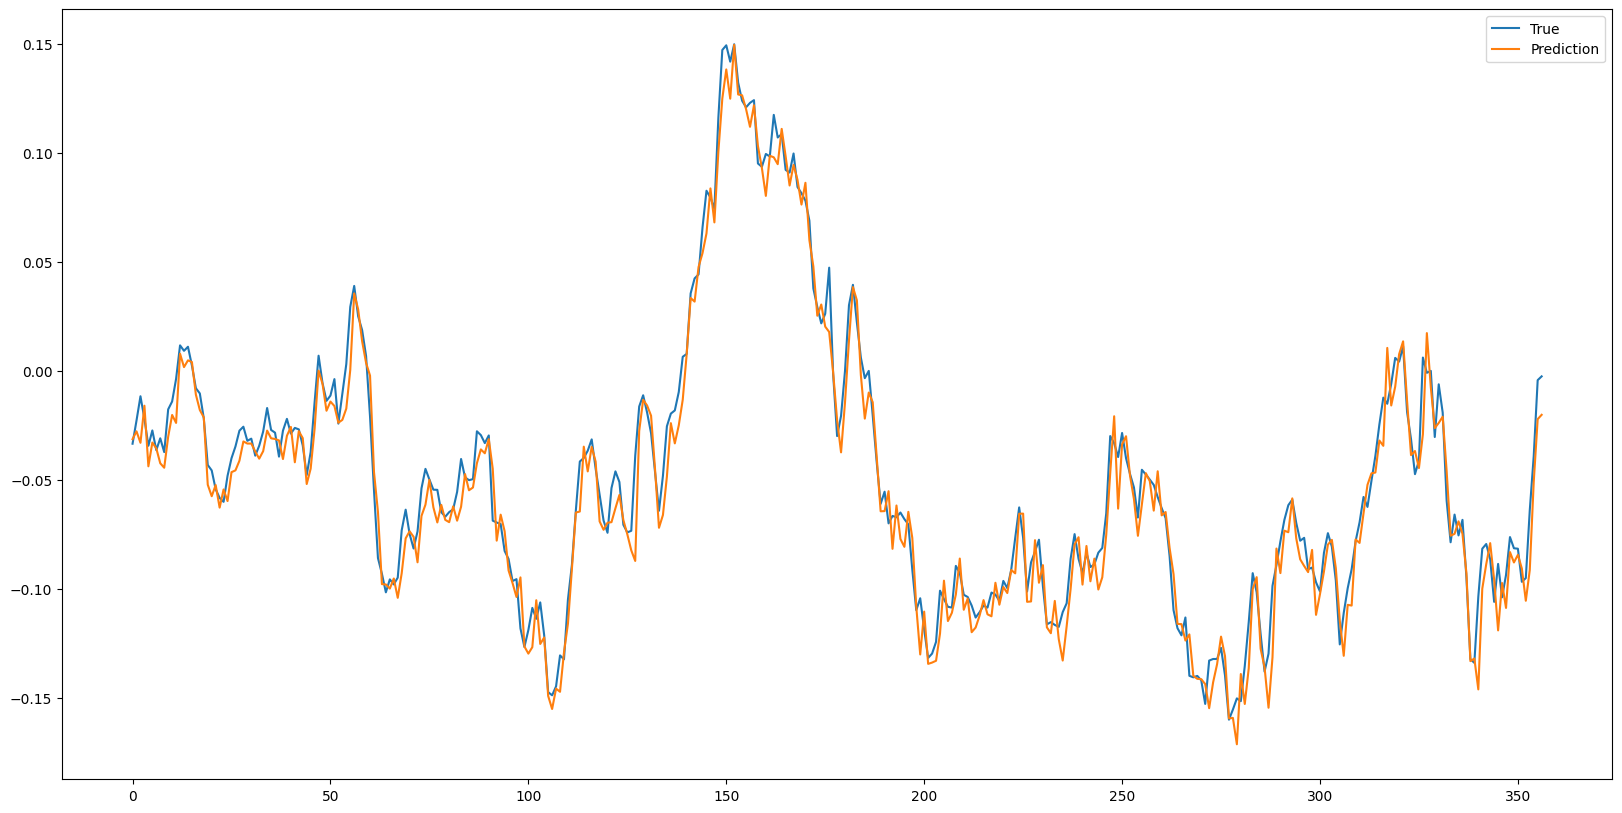

In [ ]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [ ]:
import numpy as np

def MAE(true, pred):
    return np.mean(np.abs(true-pred))

def MAPE(true, pred):
    return np.mean(np.abs((true-pred)/true))

def SMAPE(true, pred):
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred)))

def MSE(true, pred):
    return np.mean(np.square(true-pred))

RMSE_value= "{:.2f}".format(np.sqrt(MSE(testY, test_predict[0][:])))
print("RMSE = ",RMSE_value)

MAE_value= "{:.2f}".format(MAE(testY, test_predict[0][:]))
print("MAE = ",MAE_value)

MAPE_value= "{:.2f}".format(MAPE(testY, test_predict[0][:]))
print("MAPE = ",MAPE_value)

SMAPE_value= "{:.2f}".format(SMAPE(testY, test_predict[0][:]))
print("SMAPE = ",SMAPE_value)

IndexError: list index out of range

## Gragh Stock pattern

In [ ]:

# 종가(Close)만 사용할 것이기 때문에 종가만 추출
close = data['Close']

# 주식 가격의 비교 기준 구간 설정
start_data='2020-10-18'

<AxesSubplot:xlabel='Date'>

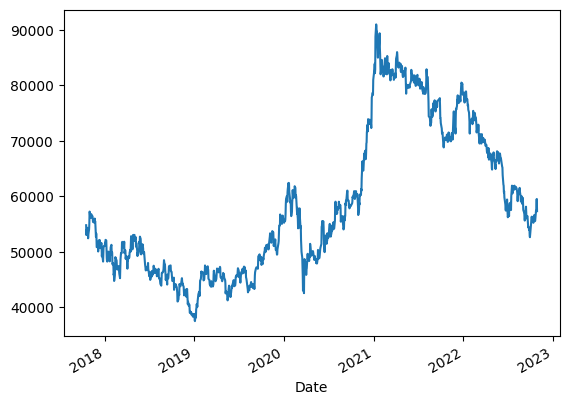

In [ ]:
close[start_data:].plot()

In [ ]:
base = close[start_data:]
base_norm = (base - base.min()) / (base.max() - base.min())
base_norm

Date
2017-10-18    0.323249
2017-10-19    0.290009
2017-10-20    0.306069
2017-10-23    0.314659
2017-10-24    0.309804
                ...   
2022-10-24    0.374416
2022-10-25    0.378151
2022-10-26    0.409897
2022-10-27    0.411765
2022-10-28    0.370682
Name: Close, Length: 1239, dtype: float64

In [ ]:
# 윈도우 사이즈: 내가 사용하는 pattern의 길이로 사용하는 데이터를 몇일치 볼 것 인지 나타낸다.
window_size = len(base)

# 예측 기간: 예측되는 기간의 길이
next_data = 10

# 검색 횟수: 계속 반복을 진행하며 전체 기록에서 내가 가지고 있는 패턴을 비교
moving_cnt = len(close) - window_size - next_data - 1

In [ ]:
def cosine_smilarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y,y)))

In [ ]:
sim_list = []

for i in range(moving_cnt):
    target = close[i:i+window_size]
    
    # Normalize
    target_norm = (target - target.min()) / (target.max() - target.min())
    
    # 코사인 유사도 저장
    cos_similarity = cosine_smilarity(base_norm, target_norm)
    
    # 코사인 유사도 <- i(인덱스), 시계열데이터 함께 저장
    sim_list.append(cos_similarity)

In [ ]:
pd.Series(sim_list).sort_values(ascending=False).head(20)


Series([], dtype: float64)

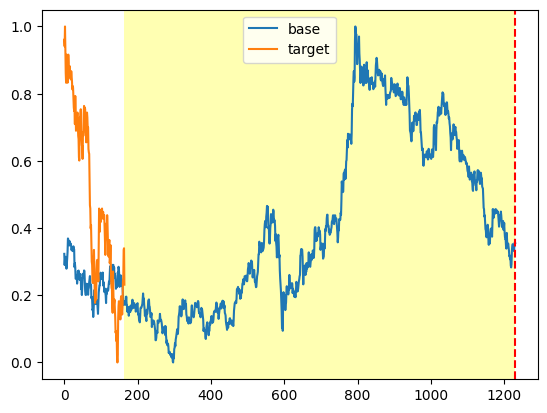

In [ ]:
idx= 1074

top_= close[idx:idx+window_size+next_data]
top_norm= (top_ - top_.min()) / (top_.max() - top_.min())

plt.plot(base_norm.values, label='base')
plt.plot(top_norm.values, label='target')
plt.axvline(x=len(base_norm)-1, c='r', linestyle='--')
plt.axvspan(len(base_norm.values)-1, len(top_norm.values)-1, facecolor='yellow', alpha=0.3)
plt.legend()
plt.show()